# Select object under changing ligh conditions

RGB is not good to use under light variable. HSV color space is more robust as **V** value changes the most with light.

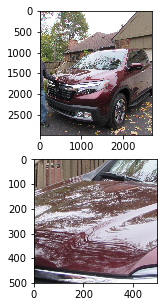

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

rgbImg = cv2.cvtColor(cv2.imread('car.jpg'), cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,5))
ax1.imshow(rgbImg)
# zoom-in cut
cut = [slice(1300,1800), slice(500,1000)]
ax2.imshow(rgbImg[cut])

Let's try to use RGB and HSV color spaces to select car.

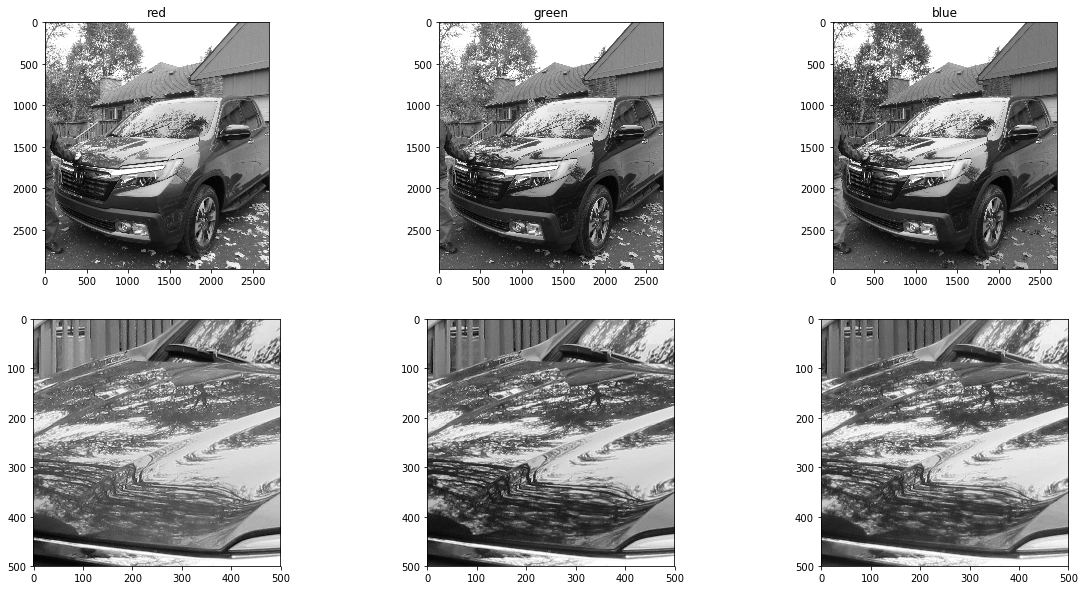

In [27]:
# RGB channels picker
r = rgbImg[:,:,0]
g = rgbImg[:,:,1]
b = rgbImg[:,:,2]

f, ((ax1, ax2, ax3),(ax1c, ax2c, ax3c)) = plt.subplots(2, 3, figsize=(20,10))
ax1.set_title('red')
ax1.imshow(r, cmap='gray')
ax2.set_title('green')
ax2.imshow(g, cmap='gray')
ax3.set_title('blue')
ax3.imshow(b, cmap='gray')
# zoom to cut-off area
ax1c.imshow(r[cut], cmap='gray')
ax2c.imshow(g[cut], cmap='gray')
ax3c.imshow(b[cut], cmap='gray')

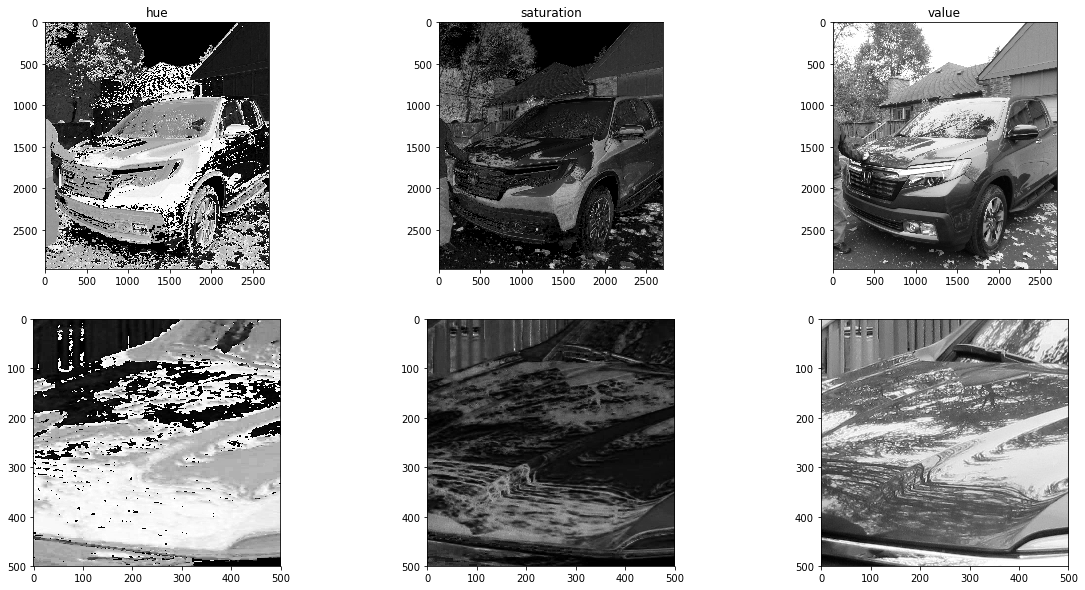

In [28]:
# in HSV space
hsvImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2HSV)

h = hsvImg[:,:,0]
s = hsvImg[:,:,1]
v = hsvImg[:,:,2]

f, ((ax1, ax2, ax3),(ax1c, ax2c, ax3c)) = plt.subplots(2, 3, figsize=(20,10))
ax1.set_title('hue')
ax1.imshow(h, cmap='gray')
ax2.set_title('saturation')
ax2.imshow(s, cmap='gray')
ax3.set_title('value')
ax3.imshow(v, cmap='gray')
# zoom to cut-off area
ax1c.imshow(h[cut], cmap='gray')
ax2c.imshow(s[cut], cmap='gray')
ax3c.imshow(v[cut], cmap='gray')

Define threshold for selecting dark cherry color of the car in both color spaces.

Define drawing helper functions, to keep main logic clean.

In [49]:
def draw2x1(title, img):
    f = plt.figure(figsize=(5,5))
    f.suptitle(title)
    plt.subplot(211)
    plt.imshow(img)
    plt.subplot(212)
    plt.imshow(img[cut])
    
def draw2x3(title, img1, img2, img3):
    f = plt.figure(figsize=(20,10))
    f.suptitle(title)
    plt.subplot(231)
    plt.imshow(img1)
    plt.subplot(232)
    plt.imshow(img2)
    plt.subplot(233)
    plt.imshow(img3)
    plt.subplot(234)
    plt.imshow(img1[cut])
    plt.subplot(235)
    plt.imshow(img2[cut])
    plt.subplot(236)
    plt.imshow(img3[cut])
    

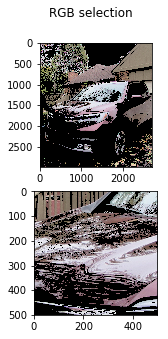

In [57]:
# RGB dark cherry color 
loCherry = np.array([110, 80, 70])
upCherry = np.array([240, 240, 250])
mask = cv2.inRange(rgbImg, loCherry, upCherry)

selection = np.copy(rgbImg)
selection[mask==0] = [0,0,0]
draw2x1('RGB selection', selection)

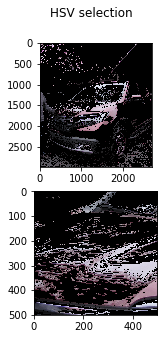

In [108]:
# HSV dark cherry color 
loCherry = np.array([110, 15, 10])
upCherry = np.array([170, 150, 255])
mask = cv2.inRange(hsvImg, loCherry, upCherry)

selection = np.copy(rgbImg)
selection[mask==0] = [0,0,0]
draw2x1('HSV selection', selection)

You can see color separation is much better in HSV. Hovewer in real life, blue sky reflection in car makes color separation difficult. Cherry is mixed with blue.